# EXPLORATORY DATA ANALYSIS USING STATS

***ABOUT DATA***

These are the main Features/Columns available in the dataset :

1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) Price: Target variable stores information of the ticket price.

#### STEP 1: IMPORT LIBS AND READ THE DATA

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

from scipy import stats

In [2]:
data = pd.read_csv('airlines_flights_data.csv')
data.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df = data.copy()
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


#### STEP 2: Basic Understanding of data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
df.shape

(300153, 12)

#### STEP 3: CHECK FOR DUPLICATES AND REMOVE UNWANTED COLUMNS

In [6]:
df[df.duplicated()]

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


In [7]:
# dropping index column

df.drop(['index'], axis=1, inplace=True)

#### STEP 4: CHECK FOR ANOMALIES AND TREAT IF ANY

In [8]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('**************')

airline
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
**************
flight
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
**************
source_city
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
**************
departure_time
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
**************
stops
['zero' 'one' 'two_or_more']
**************
arrival_time
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
**************
destination_city
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
**************
class
['Economy' 'Business']
**************
duration
[ 2.17  2.33  2.25  2.08 12.25 16.33 11.75 14.5  15.67  3.75  2.5   5.83
  8.    6.   14.67 16.17 18.   23.17 24.17  8.83  4.5  15.25 11.   19.08
 22.83 26.42 17.75 19.58 26.67 15.17 20.83 11.42 22.25 26.   21.75  3.83
  4.42  7.67  8.33 10.42 23.75 19.5   6.5  12.42 21.08 28.17 28.25  9.25
 17.92  7.08 13.83  7.58 15.83 24.42  4.17  4.

In [9]:
# NO EVIDENT ANOMALIES

#### STEP 5: CHECK DATATYPES AND TREAT THE MISCLASSIFIED

In [10]:
df.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [11]:
# NO MISSCLASSIFIED COLUMNS

#### STEP 6: Seperating numeric and categoric columns

In [12]:
print('Numeric columns are :\n', df.select_dtypes(include=np.number).columns.to_list())

Numeric columns are :
 ['duration', 'days_left', 'price']


In [13]:
num = df.select_dtypes(include=np.number).columns.to_list()

In [14]:
print('Categoric columns are :\n', df.select_dtypes(include=object).columns.to_list())

Categoric columns are :
 ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']


In [15]:
cat =  df.select_dtypes(include=object).columns.to_list()

#### STEP 7: STATS SUMMARY

In [16]:
df[num].describe().T


,count,mean,std,min,25%,50%,75%,max
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


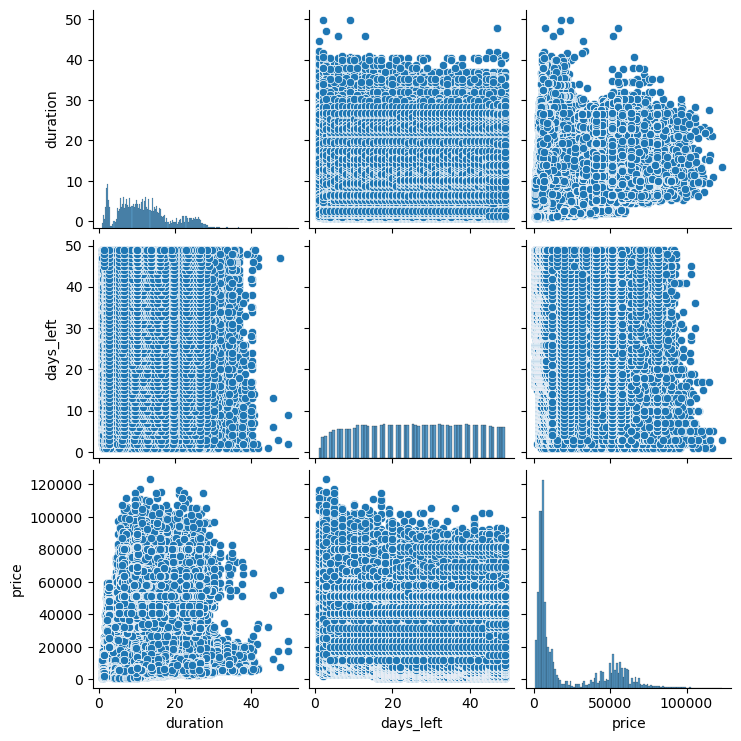

In [17]:
sns.pairplot(df[num])

In [18]:
df[cat].describe()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


#### STEP 8: Missing value treatment 

In [19]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [20]:
plt.rcParams['figure.figsize'] = [20,10]

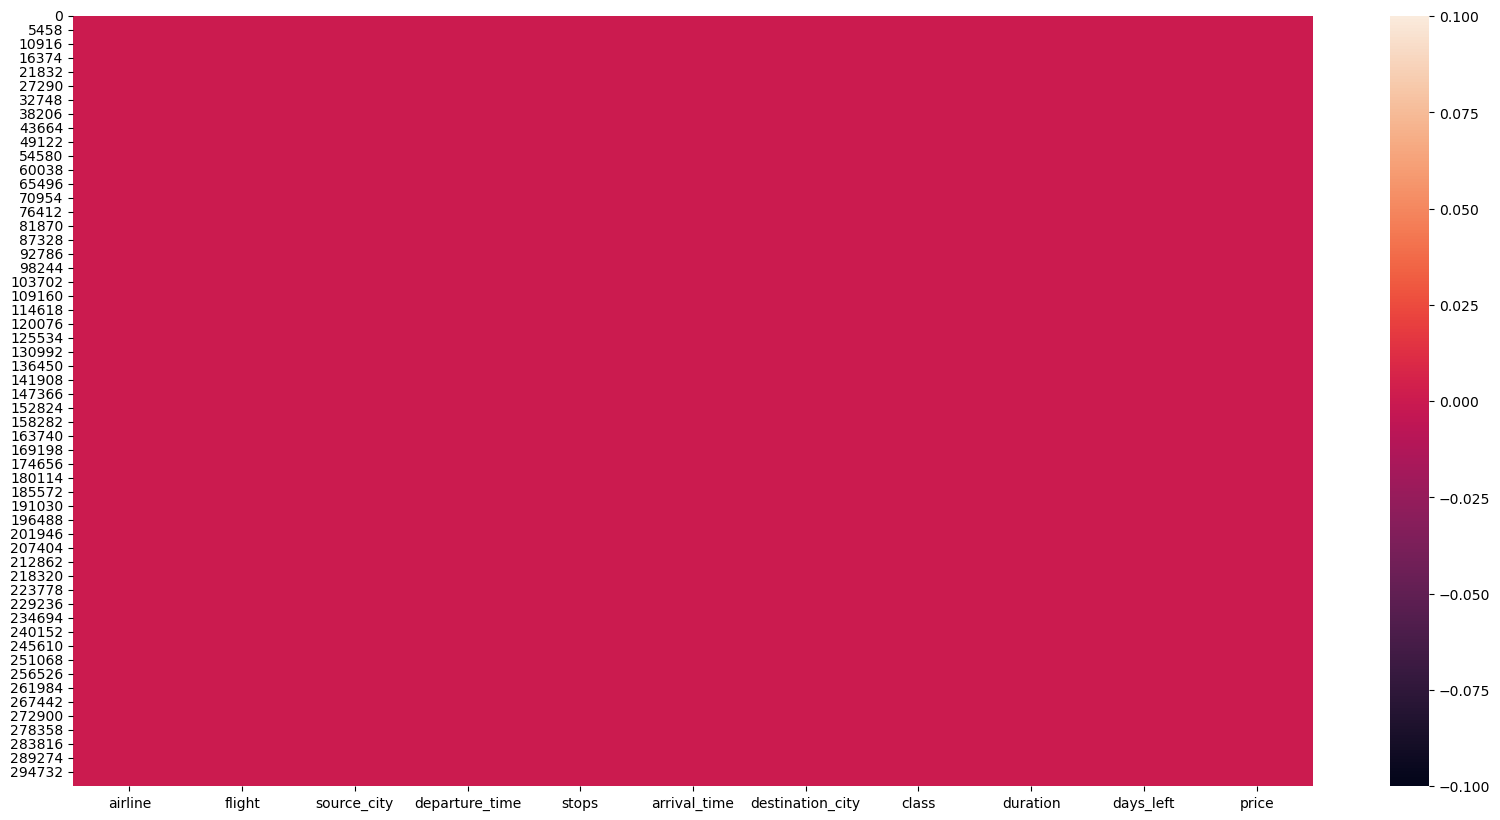

In [21]:
sns.heatmap(df.isnull())
plt.show()

#### STEP 9: Outlier detection using IQR

In [22]:
Q1 = df[num].quantile(0.25)
Q3 = df[num].quantile(0.75)

In [23]:
IQR = Q3-Q1
IQR

duration         9.34
days_left       23.00
price        37738.00
dtype: float64

In [24]:
lower_bound= Q1 - (1.5 *IQR)
upper_bound= Q3 + (1.5 *IQR)

In [25]:
lower_bound

duration        -7.18
days_left      -19.50
price       -51824.00
dtype: float64

In [26]:
upper_bound

duration        30.18
days_left       72.50
price        99128.00
dtype: float64

In [27]:
outliers = df[((df[num] < lower_bound) | (df[num] > upper_bound)).any(axis = 1)]

In [28]:
len(outliers)

2233

In [29]:
non_outliers = df[~((df[num] < lower_bound) | (df[num] > upper_bound)).any(axis = 1)]

In [30]:
non_outliers.reset_index(drop=True, inplace=True)

In [31]:
# if you are dropping save it in a variable and reset index

In [32]:
len(outliers)/len(df)*100

0.7439539168357472

## REPORT 

* The given airlines data set has nearly 3 lakhs rows and 12 columns
* Price is target variable
* Index column is not neccessary for analysis. So it is removed.
* No evident anomalies in the given data
* No duplicate rows
* No missing values
* Only 0.75% (2233 rows) of outliers rows. Let us keep these rows for the furtur analysis.
* The numeric columns are days_left, duration and price and among those columns, price and duration are seems to be right skewed.
* Most of the flights are by Vistara
* Majority of the travellers are preffering Economy class etc,...,



#### STEP 10: DEEP ANALYSIS

***Univarite analysis - numeric***

* Understanding the target variable 

In [33]:
def target_analysis(column):
    print(f'Target column is {column}')
    print(f'Range of the target is {df[column].max() - df[column].min()}')
    print(f'Skewness of target is {df[column].skew()}')
    print(f'kurtosis of target is {df[column].kurt()}')

    
    sns.boxplot(df[column])

    sns.kdeplot(df[column])
    plt.show()

Target column is price
Range of the target is 121966
Skewness of target is 1.0613772532064343
kurtosis of target is -0.3962927186960772


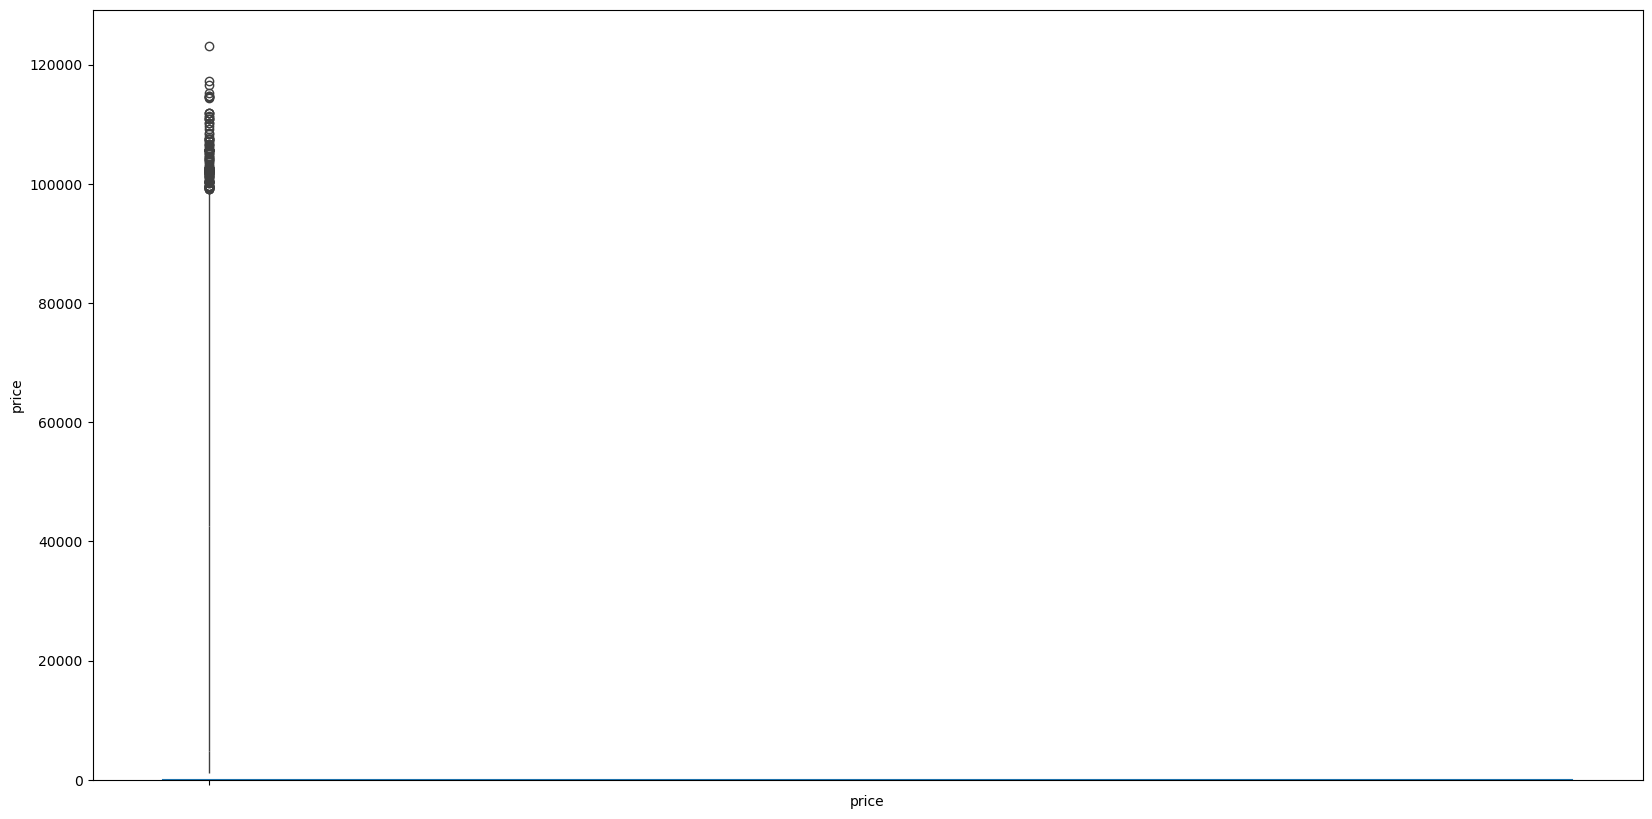

In [34]:
target_analysis('price')

In [35]:
df[num].skew()

duration     0.602899
days_left   -0.035464
price        1.061377
dtype: float64

In [36]:
df[num].kurt()

duration    -0.268996
days_left   -1.156215
price       -0.396293
dtype: float64

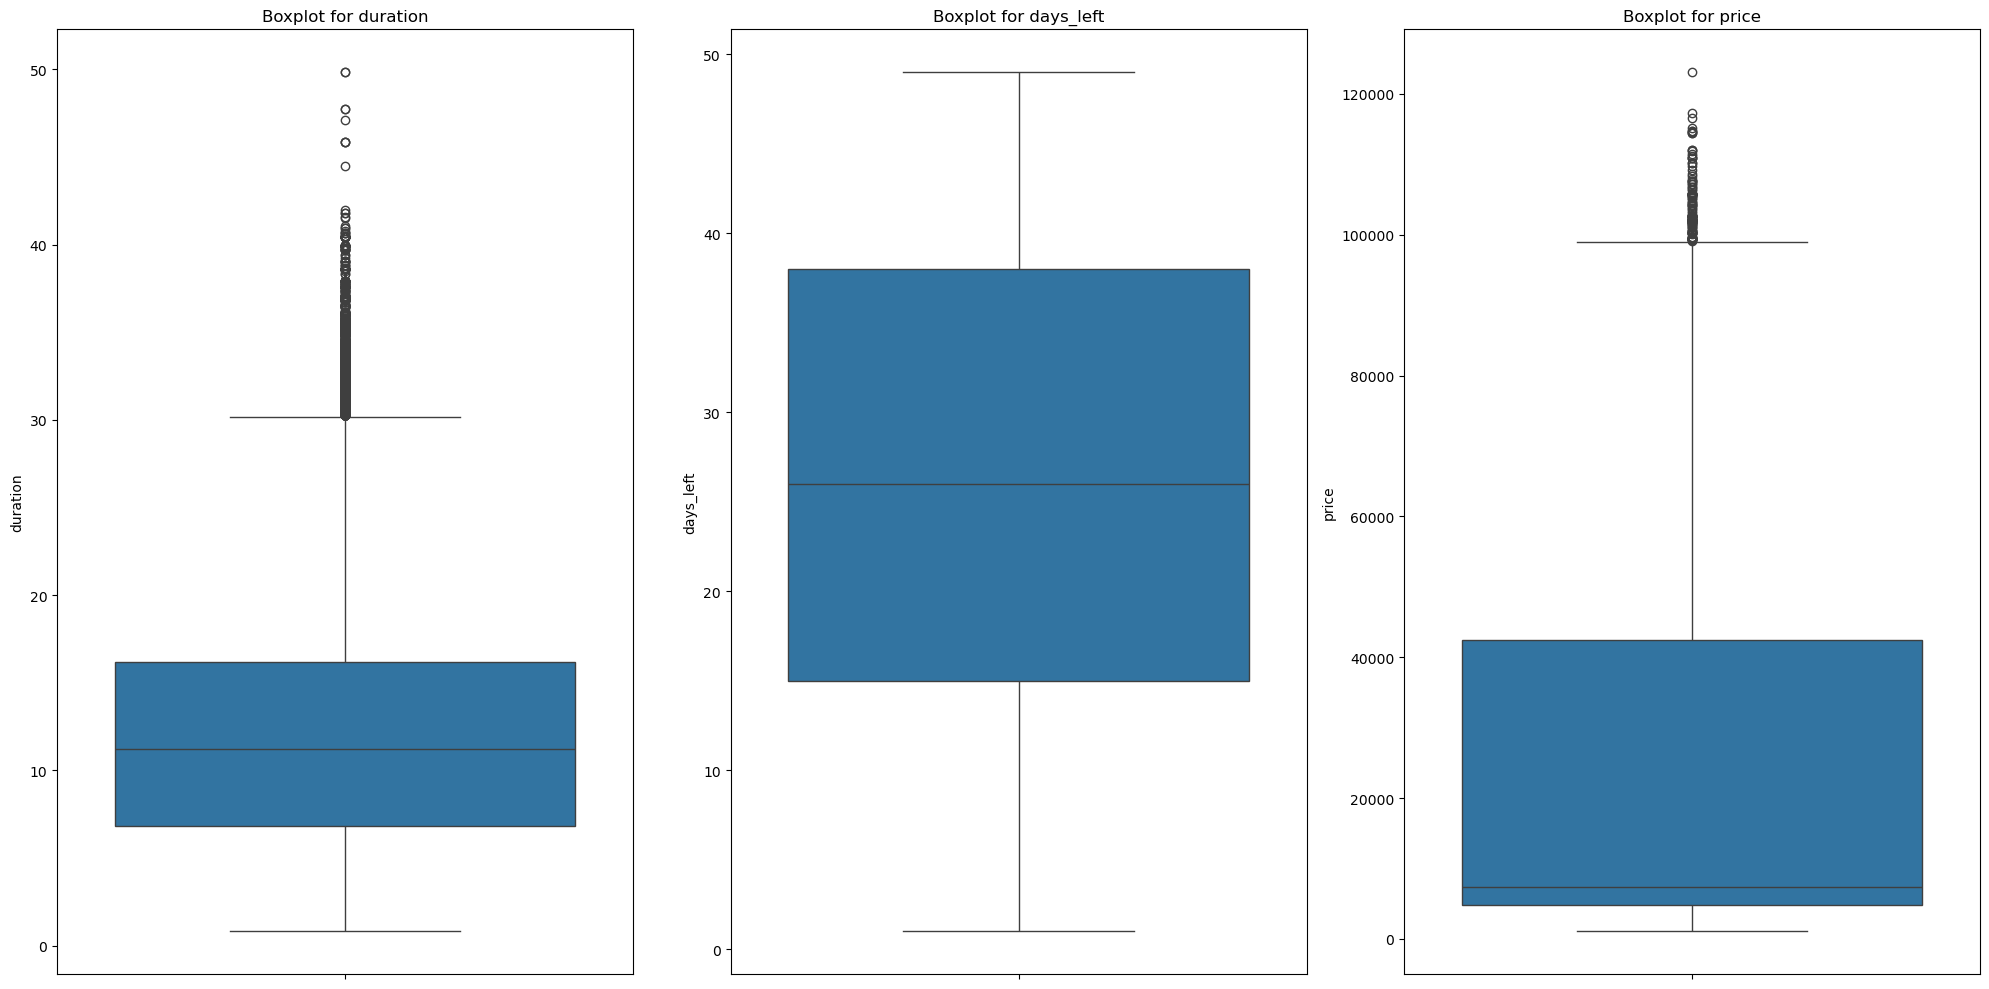

In [37]:
t=1
for i in num:
    plt.subplot(1,3,t)
    sns.boxplot(df[i])
    plt.title(f'Boxplot for {i}')
    t+=1

plt.tight_layout()
plt.show()

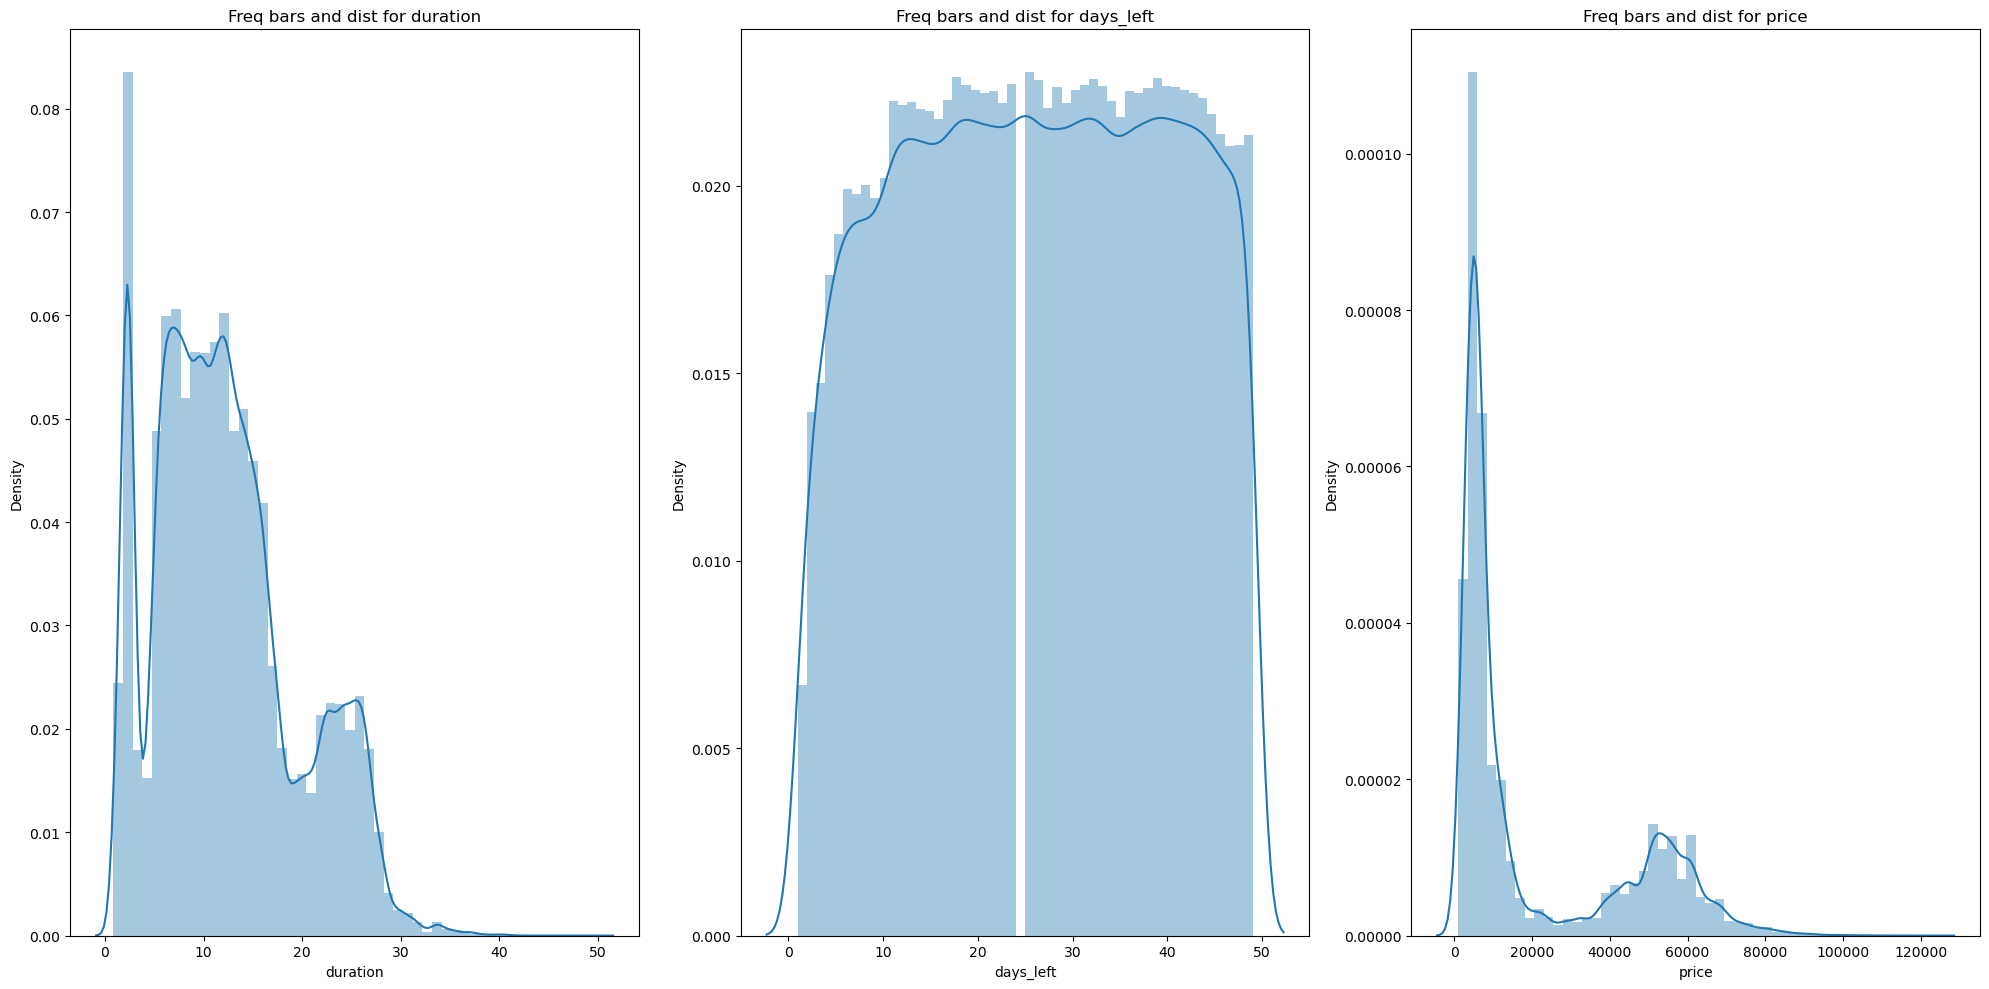

In [38]:
t=1
for i in num:
    plt.subplot(1,3,t)
    sns.distplot(df[i])
    plt.title(f'Freq bars and dist for {i}')
    t+=1

plt.tight_layout()
plt.show()

##### Inference:

* There is no evident outliers in days_left and we can see evident outliers in duration and price.

***Univarite analysis - categoric***

In [39]:
for i in cat:
    print(df[i].value_counts(normalize=True)*100)
    print('------------')

airline
Vistara      42.597942
Air_India    26.950255
Indigo       14.366007
GO_FIRST      7.720396
AirAsia       5.363265
SpiceJet      3.002136
Name: proportion, dtype: float64
------------
flight
UK-706     1.077784
UK-772     0.913201
UK-720     0.882883
UK-836     0.846901
UK-822     0.822247
             ...   
6E-2914    0.000333
G8-107     0.000333
SG-9974    0.000333
6E-865     0.000333
SG-8339    0.000333
Name: proportion, Length: 1561, dtype: float64
------------
source_city
Delhi        20.437244
Mumbai       20.288320
Bangalore    17.344821
Kolkata      15.441125
Hyderabad    13.595067
Chennai      12.893424
Name: proportion, dtype: float64
------------
departure_time
Morning          23.703245
Early_Morning    22.251985
Evening          21.689605
Night            15.996842
Afternoon        15.923212
Late_Night        0.435111
Name: proportion, dtype: float64
------------
stops
one            83.578375
zero           11.995216
two_or_more     4.426409
Name: proportion, dty

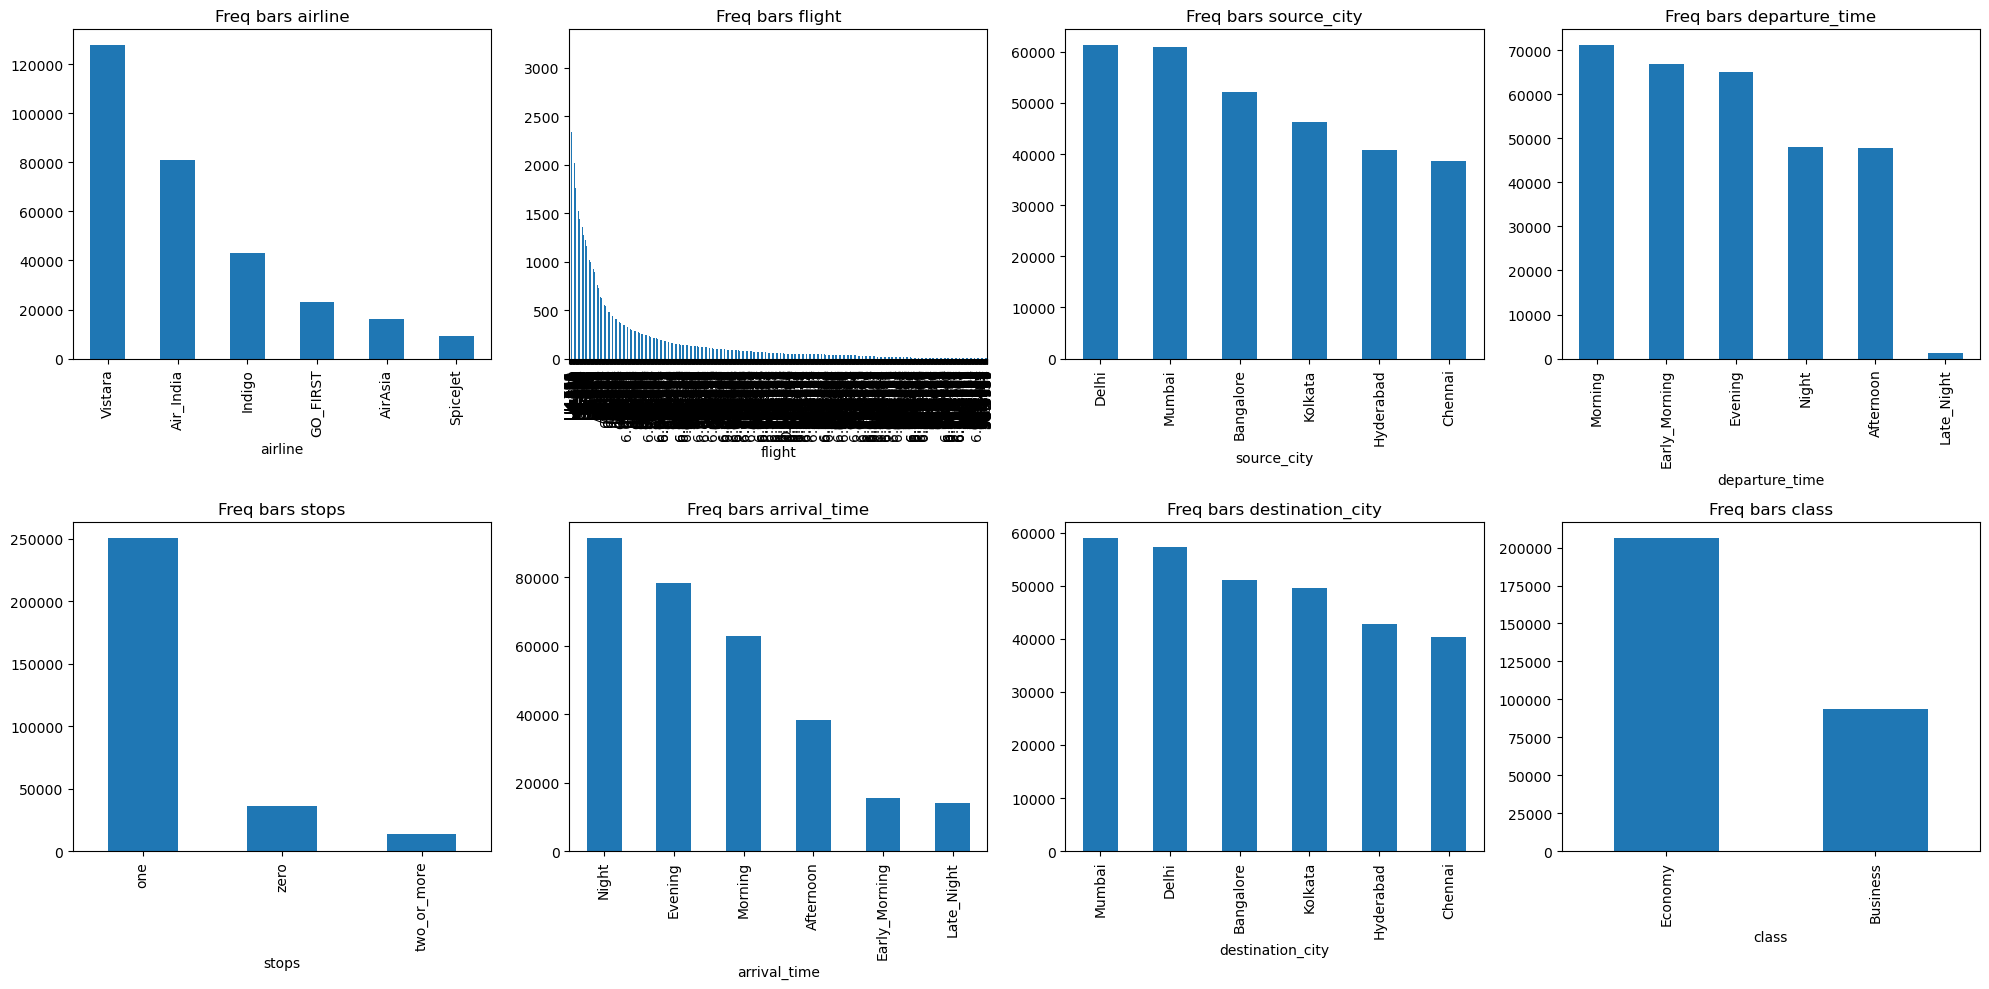

In [40]:
t=1
for i in cat:
    plt.subplot(2,4,t)
    df[i].value_counts().plot(kind='bar')
    plt.title(f'Freq bars {i}')
    t+=1

plt.tight_layout()
plt.show()

##### Inference
* Vistara flights are more 
* Most of the flights takes off during morng and arrived during night.
* Most of the flights have one stop before landing etc..

***Bivariate analysis Num vs target***

In [41]:
for i in num:
    if i !='price':
        print(f'Corr between {i} and price {df[i].corr(df['price'])}')

Corr between duration and price 0.20422236784542758
Corr between days_left and price -0.09194853217143842


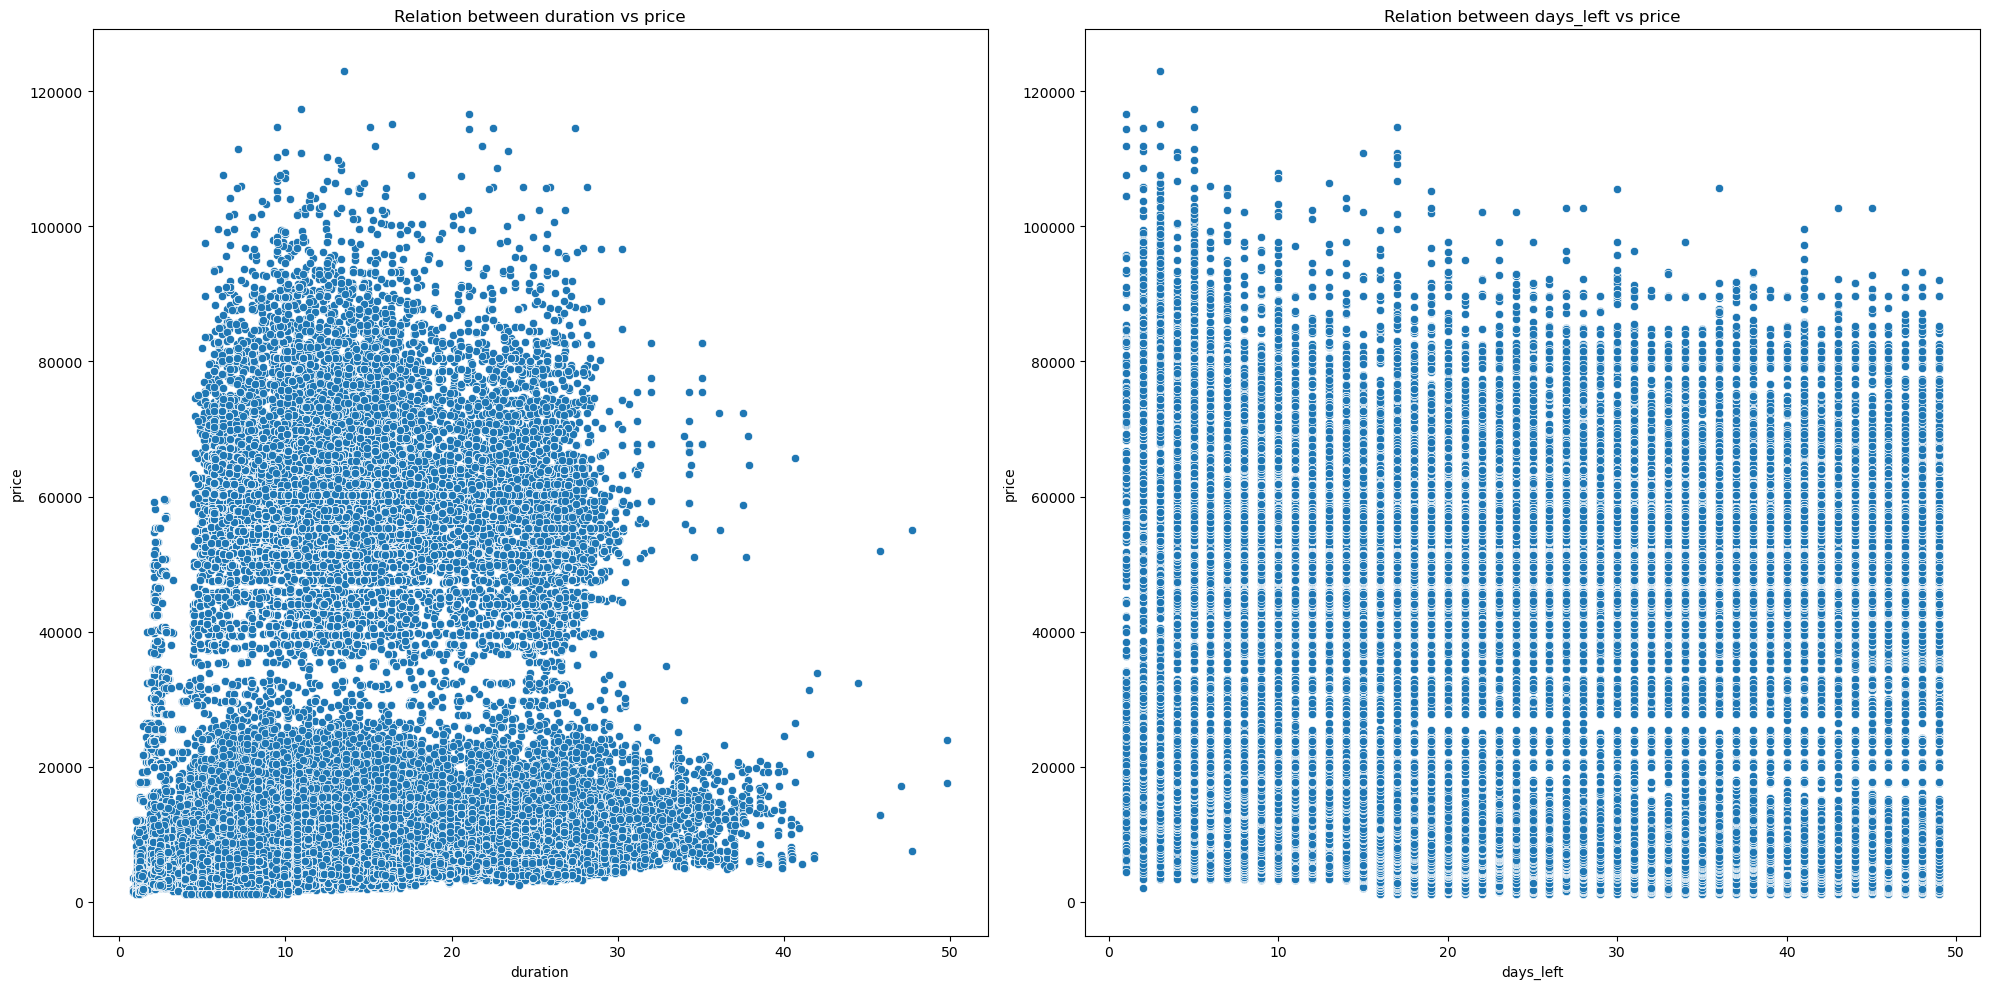

In [42]:
t=1
for i in num:
    if i !='price':
        plt.subplot(1,2,t)
        sns.scatterplot(x=df[i], y = df['price'])
        plt.title(f'Relation between {i} vs price')
        t+=1
plt.tight_layout()
plt.show()

##### Inference:

* Duration and price have slight positive relation and days_left and price have very week relation

***Bivariate analysis Num vs cat***

In [43]:
for i in cat:
    print(df.groupby(i)['price'].mean().sort_values(ascending=False))
    print('------------')

airline
Vistara      30396.536302
Air_India    23507.019112
SpiceJet      6179.278881
GO_FIRST      5652.007595
Indigo        5324.216303
AirAsia       4091.072742
Name: price, dtype: float64
------------
flight
AI-433     44025.000000
UK-820     40522.342664
UK-930     39953.565074
UK-985     39568.600798
UK-970     39421.341424
               ...     
6E-6381     1443.000000
6E-7259     1105.000000
6E-7252     1105.000000
6E-7141     1105.000000
6E-557      1105.000000
Name: price, Length: 1561, dtype: float64
------------
source_city
Chennai      21995.339871
Kolkata      21746.235679
Mumbai       21483.818839
Bangalore    21469.460575
Hyderabad    20155.623879
Delhi        18951.326639
Name: price, dtype: float64
------------
departure_time
Night            23062.146808
Morning          21630.760254
Evening          21232.361894
Early_Morning    20370.676718
Afternoon        18179.203331
Late_Night        9295.299387
Name: price, dtype: float64
------------
stops
one            229

In [44]:
upper_bound

duration        30.18
days_left       72.50
price        99128.00
dtype: float64

In [45]:
non_outliers.groupby('airline')['price'].max()

airline
AirAsia      31917
Air_India    90970
GO_FIRST     32803
Indigo       31952
SpiceJet     34158
Vistara      98972
Name: price, dtype: int64

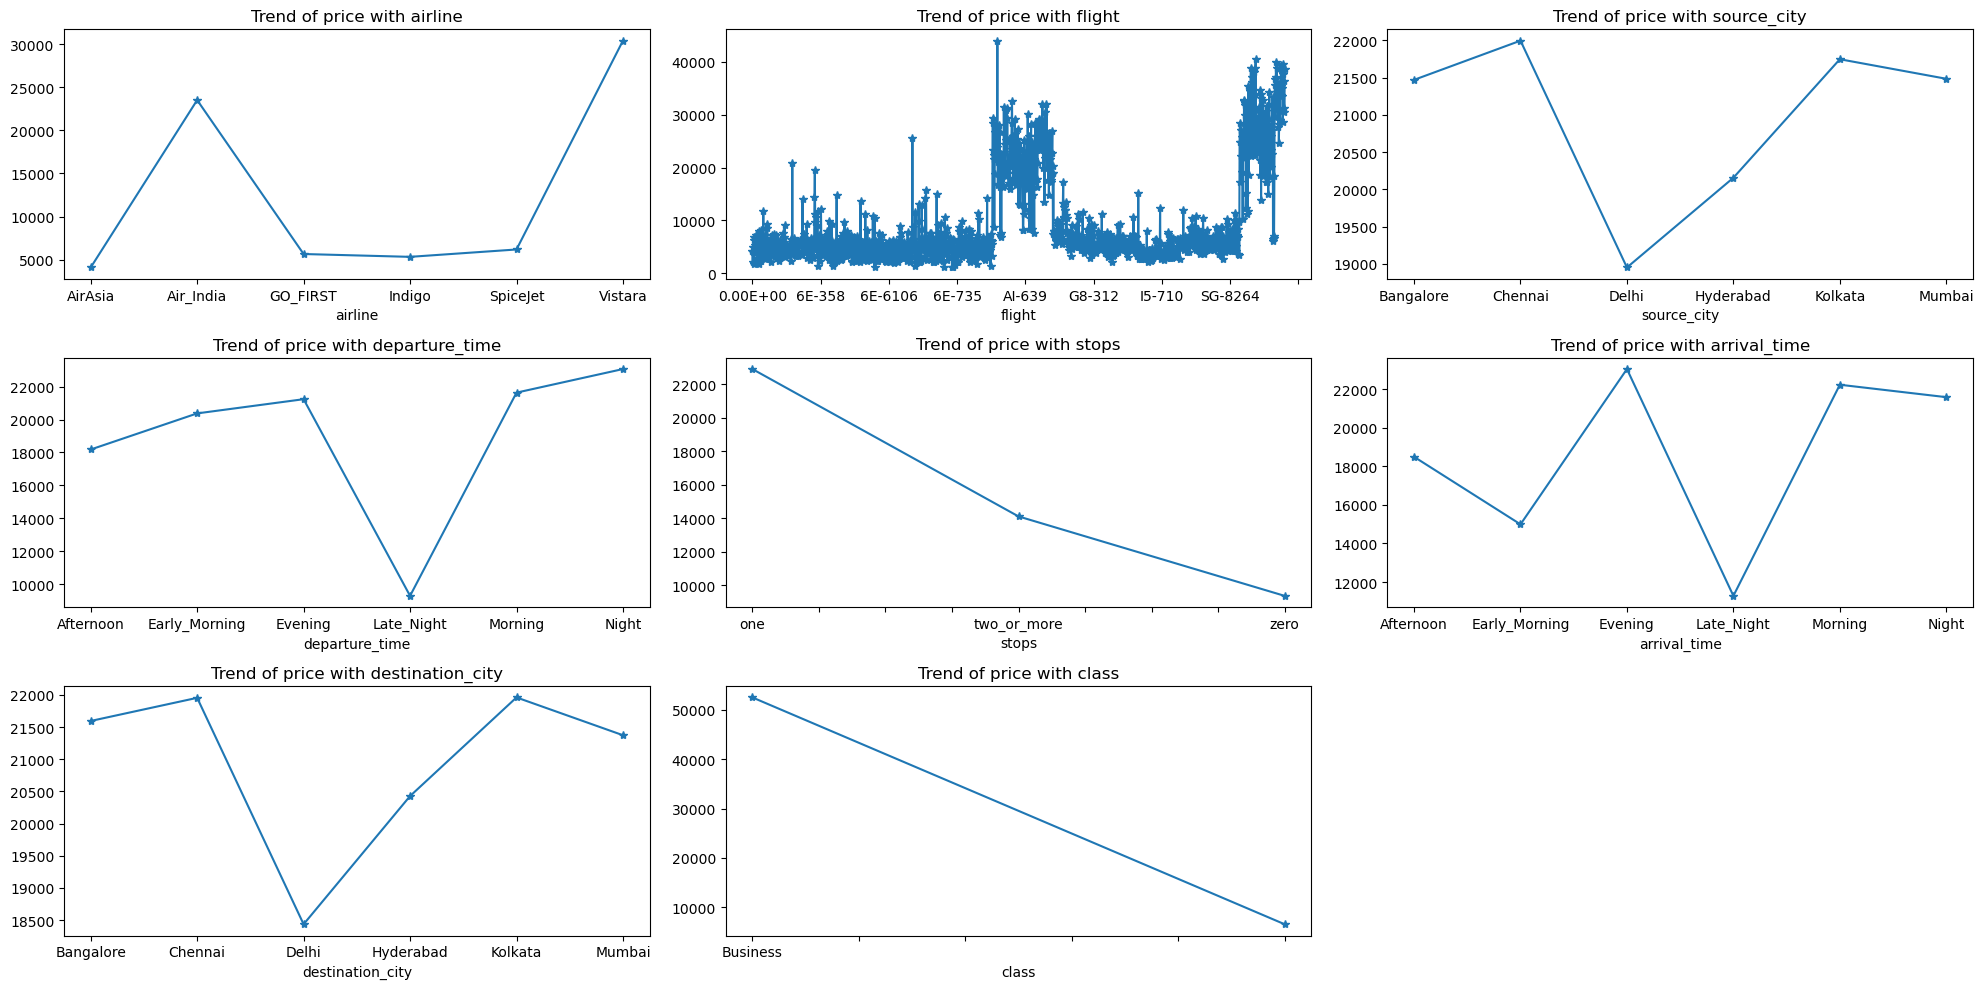

In [46]:
t = 1
for i in cat:
    plt.subplot(3,3,t)
    df.groupby(i)['price'].mean().plot(marker = '*')
    plt.title(f'Trend of price with {i}')
    t+=1
plt.tight_layout()
plt.show()

##### Inference:

* Vistara airlines is costly when compare to other ( indicating outliers in vistara, i.e,price >99128.00). So it affects the avg price
* We have no evidence to support flight id is relevent to predict price so dropping it
* Business class has more avg price
* One stop flight's avg price is more( May be due to the stop in metro tier cities)

***Bivariate Analysis Cat vs Cat***
* pd.crosstab(a,b)
* countplot(x,hue)

***Multivariate Analysis***

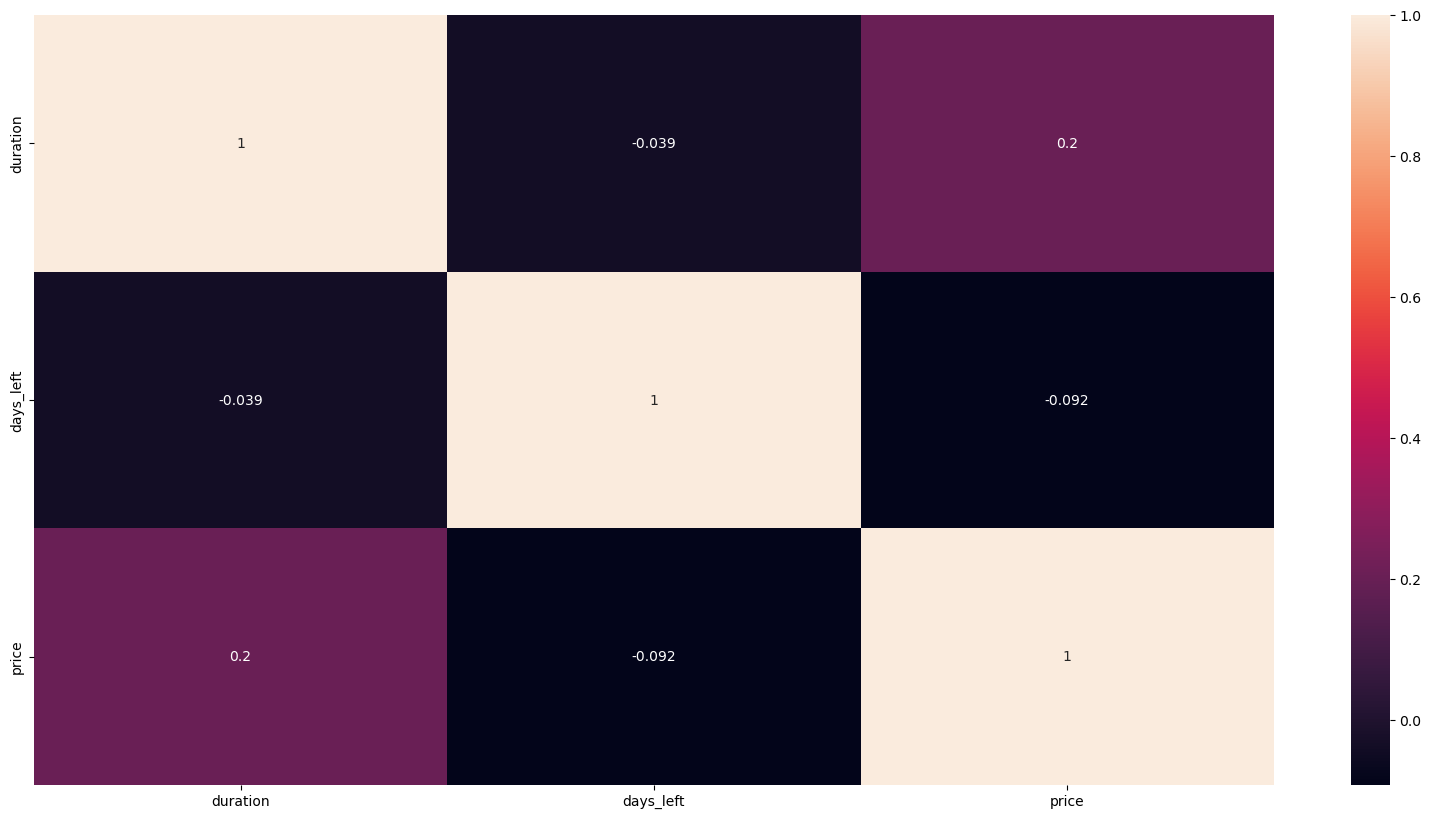

In [47]:
sns.heatmap(df[num].corr(),annot=True)
plt.show()

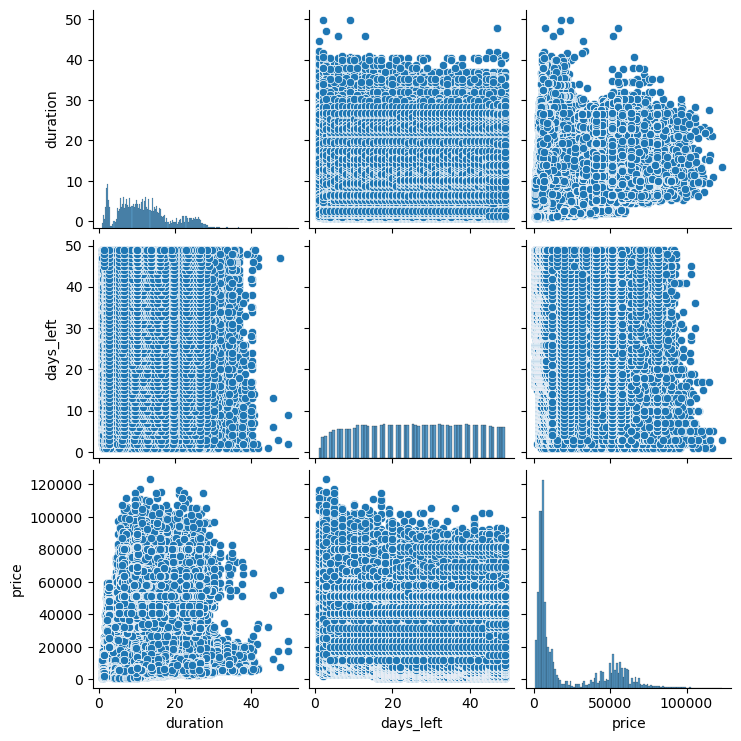

In [48]:
sns.pairplot(df)
plt.show()

##### Check whether we have any patterns between price and duration for each  Airlines

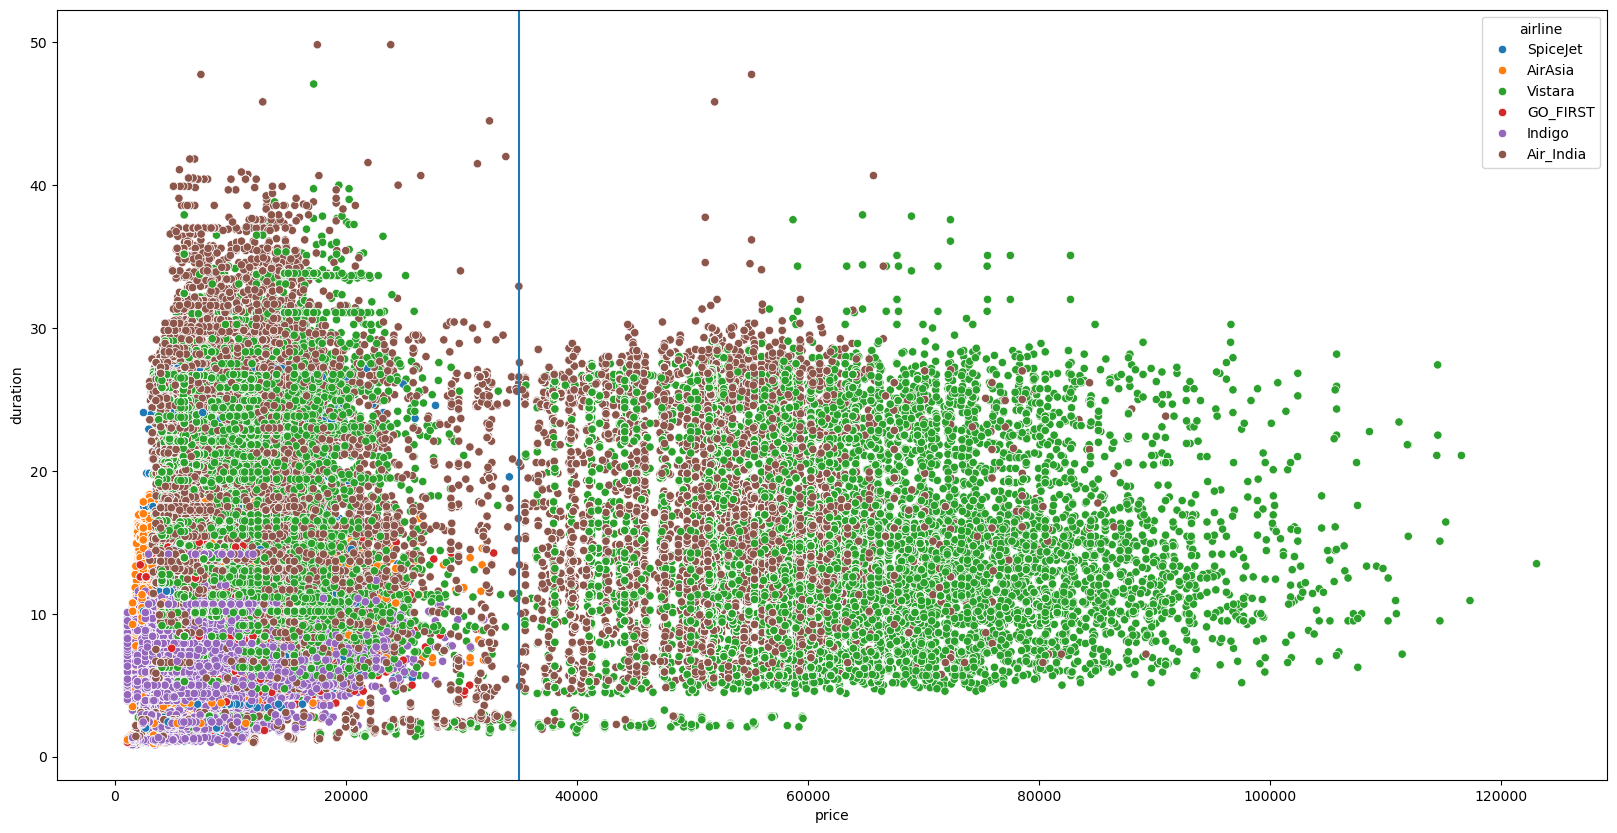

In [49]:
sns.scatterplot(x=df['price'], y = df['duration'], hue = df['airline'])
plt.axvline(35000)
plt.show()

* Most of the airlines cost <35000 forthe flight travell but the plot indicates Vistara airlines cost more (outliers) and Air India takes more time to reach destination( outliers in duration) 

### STEP 11: ANALYSIS USING HYPOTHESIS TESTING with 95% of confidence

***1.Check whether duration taken has any effect on price(target) of the flights.***

In [50]:
df[['duration','price']].head()

,duration,price
0,2.17,5953
1,2.33,5953
2,2.17,5956
3,2.25,5955
4,2.33,5955


    Ho: Duration taken has no impact on price( not related/ independence )
    Ha: Duration taken has impact on price (related / dependence)

Since both are numeric data with different units we can use Pearson R test to check the relation

In [51]:
stats.pearsonr(df['duration'], df['price'])

PearsonRResult(statistic=np.float64(0.20422236784542727), pvalue=np.float64(0.0))

Conclusion:

* Pvalue (0) is less then sig level(0.05)
* Reject Ho

Duration taken has impact on price (related / dependence)

***2.Check whether days left has any impact on price(target) of the flights.***

In [52]:
df[['days_left','price']].head()

,days_left,price
0,1,5953
1,1,5953
2,1,5956
3,1,5955
4,1,5955


    Ho: Days left has no impact on price( not related/ independence )
    Ha: Days left taken has impact on price (related / dependence)

Since both are numeric data with different units we can use Pearson R test to check the relation

In [53]:
stats.pearsonr(df['days_left'], df['price'])

PearsonRResult(statistic=np.float64(-0.09194853217143852), pvalue=np.float64(0.0))

Conclusion:

* Pvalue (0) is less then sig level(0.05)
* Reject Ho

Days left has impact on price (related / dependence)

***3.Check whether airlines have impact on price(target) of the flights.Check for parametric assumptions***

In [54]:
#samples:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [55]:
samp1 = df[df['airline'] == 'SpiceJet']['price']
samp2 = df[df['airline'] == 'AirAsia']['price']
samp3 = df[df['airline'] == 'Vistara']['price']
samp4 = df[df['airline'] == 'GO_FIRST']['price']
samp5 = df[df['airline'] == 'Indigo']['price']
samp6 = df[df['airline'] == 'Air_India']['price']

**Parametric assumptions**

1.Test for nomality

    Ho: data is normal
    Ha: data is not normal

In [56]:
print(stats.shapiro(samp1))
print(stats.shapiro(samp2))
print(stats.shapiro(samp3))
print(stats.shapiro(samp4))
print(stats.shapiro(samp5))
print(stats.shapiro(samp6))

ShapiroResult(statistic=np.float64(0.8338498614189992), pvalue=np.float64(2.3572311293987898e-70))
ShapiroResult(statistic=np.float64(0.6949860484237982), pvalue=np.float64(9.839830864484451e-98))
ShapiroResult(statistic=np.float64(0.8386807446423823), pvalue=np.float64(1.8272421189272085e-131))
ShapiroResult(statistic=np.float64(0.8034022282049342), pvalue=np.float64(6.6838260249901475e-96))
ShapiroResult(statistic=np.float64(0.835179697402167), pvalue=np.float64(2.1261448553500214e-106))
ShapiroResult(statistic=np.float64(0.8066550070099585), pvalue=np.float64(5.071434845042653e-126))


* Pvalue (0) < sig level
* Reject Ho
* Data is not normal in all the samples

2.Test for variance

    Ho: Variance are equal among all smaples.
    Ha: Variance are not equal among all smaples.

In [57]:
stats.levene(samp1,samp2,samp3,samp4,samp5,samp6)

LeveneResult(statistic=np.float64(22316.067549774074), pvalue=np.float64(0.0))

* Pvalue (0) < sig level
* Reject Ho
* Variance are not equal among all smaples.

***Assume data is normal and of equal variance and proceeding with parametric test ANOVA test***

ANOVA TEST

    Ho: Means of all samples are equal (Airlines have no impact on price)
    Ha: Atleast one group's mean is different (Airlines have impact on price)

In [58]:
stats.f_oneway(samp1,samp2,samp3,samp4,samp5,samp6)

F_onewayResult(statistic=np.float64(17194.402096092348), pvalue=np.float64(0.0))

In [59]:
N = len(df['price'])
k = 6

dof1 = k -1
dof2 = N - k

In [60]:
stats.f.isf(0.05, dof1, dof2)

np.float64(2.2141293057623455)

Conclusion:

* P value (0) is less than sig value and test stats value is greater than f crit values
* Reject Ho

Atleast one group's mean is different (Airlines have impact on price)

In [61]:
### POST HOC TEST

In [62]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [63]:
pairwise_tukeyhsd(df['price'], df['airline']).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
AirAsia,Air_India,19415.9464,0.0,18923.7733,19908.1195,True
AirAsia,GO_FIRST,1560.9349,0.0,975.8053,2146.0644,True
AirAsia,Indigo,1233.1436,0.0,706.4055,1759.8816,True
AirAsia,SpiceJet,2088.2061,0.0,1337.9054,2838.5069,True
AirAsia,Vistara,26305.4636,0.0,25828.53,26782.3972,True
Air_India,GO_FIRST,-17855.0115,0.0,-18279.926,-17430.097,True
Air_India,Indigo,-18182.8028,0.0,-18522.845,-17842.7606,True
Air_India,SpiceJet,-17327.7402,0.0,-17961.0861,-16694.3944,True
Air_India,Vistara,6889.5172,0.0,6633.3114,7145.723,True
GO_FIRST,Indigo,-327.7913,0.3359,-792.3028,136.7202,False


* Since majority of the pairs mean are different we need to give this pattern to the model
* Based on the airlines price of the flights differs

***4.Check whether stops have impact on price(target) of the flights.Assume data is normal and have equal variance***

***Assume data is normal and of equal variance and proceeding with parametric test ANOVA test***

In [64]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [65]:
samp1 = df[df['stops'] == 'zero']['price'] 
samp2 = df[df['stops'] == 'one']['price'] 
samp3 = df[df['stops'] == 'two_or_more']['price'] 

ANOVA TEST

    Ho: Means of all samples are equal (Stops have no impact on price)
    Ha: Atleast one group's mean is different (stops have impact on price)

In [66]:
stats.f_oneway(samp1,samp2,samp3)

F_onewayResult(statistic=np.float64(6477.130362486221), pvalue=np.float64(0.0))

In [67]:
N = len(df['price'])
k = 3

dof1 = k -1
dof2 = N - k

In [68]:
stats.f.isf(0.05, dof1, dof2)

np.float64(2.995762173676137)

Conclusion:

* P value (0) is less than sig value and test stats value is greater than f crit values
* Reject Ho

Atleast one group's mean is different (Stops have impact on price)

In [69]:
### POST HOC TEST

In [70]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [71]:
pairwise_tukeyhsd(df['price'], df['stops']).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
one,two_or_more,-8787.5417,0.0,-9251.2239,-8323.8595,True
one,zero,-13525.0539,0.0,-13818.5877,-13231.5202,True
two_or_more,zero,-4737.5122,0.0,-5266.2232,-4208.8013,True


* All pairs mean are different we need to give this pattern to the model
* Based on the stops price of the flights differs

***4.Check whether class of the flights have impact on price(target) of the flights.Assume data is normal and have equal variance***

***Assume data is normal and of equal variance and proceeding with parametric test ANOVA test***

In [72]:
df['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [73]:
samp1 = df[df['class'] == 'Economy']['price'] 
samp2 = df[df['class'] == 'Business']['price'] 

T test Independent

    Ho: Both Means  are equal (Class have no impact on price)
    Ha: Both means are different (Class have impact on price)

In [74]:
stats.ttest_ind(samp1,samp2)

TtestResult(statistic=np.float64(-1480.683826786644), pvalue=np.float64(0.0), df=np.float64(300151.0))

In [75]:
stats.t.isf(0.05/2,df=300151)

np.float64(1.95997188816401)

In [76]:
xbar1 = np.mean(samp1)
xbar2 = np.mean(samp2)

std1 = np.std(samp1, ddof = 1)
std2 = np.std(samp2, ddof = 1)

n1 = len(samp1)
n2 = len(samp2)

In [77]:
t_stats = ( xbar1 - xbar2 ) / np.sqrt( (std1**2/n1) +  (std2**2/n2))
t_stats

np.float64(-1063.8446994194571)

In [78]:
stats.f.isf(0.05, dof1, dof2)

np.float64(2.995762173676137)

Conclusion:

* P value (0) is less than sig value and abs(test stats value) is greater than f crit values
* Reject Ho

Both means are different (Class have impact on price)

***4.Check whether departure_time and arrival_time are related or not***

CHI SQUARE TEST FOR INDEPENDENCE

    Ho: Departure_time and arrival_time are not related 
    Ha: Departure_time and arrival_time are related 

In [79]:
f_obs = pd.crosstab(df['departure_time'], df['arrival_time'])
f_obs

arrival_time,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night
departure_time,,,,,,
Afternoon,3823,1228,12862,3052,5914,20915
Early_Morning,12435,3185,18866,800,13343,18161
Evening,5407,4626,13003,5644,17498,18924
Late_Night,73,501,94,137,395,106
Morning,10624,1654,24289,1390,9509,23680
Night,5777,4223,9209,2978,16076,9752


In [80]:
chi_stats, p_value, dof, f_exp =stats.chi2_contingency(f_obs)

In [81]:
chi_stats, p_value

(np.float64(33391.31253268134), np.float64(0.0))

In [82]:
chi_crit = stats.chi2.isf(0.05, df = (6-1)*(6-1))
chi_crit

np.float64(37.65248413348277)

Conclusion:

* Pvalue (0) is less tahn sig value and chi stats is greater than crit value
* Reject Ho

Departure_time and arrival_time are related 

### STEP 12: ENCODING

In [83]:
# dropping flight

df.drop('flight',axis = 1, inplace=True)

In [84]:
cat = ['airline',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class']

In [85]:
df[cat].head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy


***stops - Ordinal encoding***

In [86]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [87]:
from sklearn.preprocessing import OrdinalEncoder

In [88]:
o = OrdinalEncoder(categories=[['zero', 'one', 'two_or_more']])

In [89]:
df['stops'] = o.fit_transform(df[['stops']])

In [90]:
df['stops'].unique()

array([0., 1., 2.])

***class - Ordinal encoding***

In [91]:
df['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [92]:
df['class'] = df['class'].replace({'Economy':0, 'Business':1})

In [93]:
df['class'].unique()

array([0, 1])

***'departure_time','arrival_time' - Ordinal encoding***

In [94]:
df['arrival_time'].unique()

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

In [95]:
df['departure_time'].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [96]:
for i in ['departure_time', 'arrival_time']:
    o = OrdinalEncoder(categories=[[ 'Early_Morning', 'Morning', 'Afternoon','Evening','Night',
       'Late_Night' ]])
    df[i] =o.fit_transform(df[[i]])
            

In [97]:
df['arrival_time'].unique()

array([4., 1., 0., 2., 3., 5.])

In [98]:
df['departure_time'].unique()

array([3., 0., 1., 2., 4., 5.])

***'airline','source_city','destination_city' - Label Encoding***

In [99]:
from sklearn.preprocessing import LabelEncoder

In [100]:
l = LabelEncoder()

In [101]:
for  i in ['airline','source_city','destination_city']:
    df[i] = l.fit_transform(df[[i]])

In [102]:
df[['airline','source_city','destination_city']].head()

,airline,source_city,destination_city
0,4,2,5
1,4,2,5
2,0,2,5
3,5,2,5
4,5,2,5


***ONE HOT ENCODING, N-1 DUMMY ENCODING***

In [103]:
pd.get_dummies(data = non_outliers, columns=['airline',	'source_city'],dtype=int) # dummy

,flight,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,airline_AirAsia,...,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai
0,SG-8709,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0,...,0,0,1,0,0,0,1,0,0,0
1,SG-8157,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0,...,0,0,1,0,0,0,1,0,0,0
2,I5-764,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,1,...,0,0,0,0,0,0,1,0,0,0
3,UK-995,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,0,...,0,0,0,1,0,0,1,0,0,0
4,UK-963,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297915,UK-822,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,0,...,0,0,0,1,0,1,0,0,0,0
297916,UK-826,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,0,...,0,0,0,1,0,1,0,0,0,0
297917,UK-832,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,0,...,0,0,0,1,0,1,0,0,0,0
297918,UK-828,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,0,...,0,0,0,1,0,1,0,0,0,0


In [104]:
pd.get_dummies(data = non_outliers, columns=['airline',	'source_city'],dtype=int,drop_first=True) #N-i

,flight,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai
0,SG-8709,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0,0,0,1,0,0,1,0,0,0
1,SG-8157,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0,0,0,1,0,0,1,0,0,0
2,I5-764,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,0,0,0,0,0,0,1,0,0,0
3,UK-995,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,0,0,0,0,1,0,1,0,0,0
4,UK-963,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297915,UK-822,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,0,0,0,0,1,1,0,0,0,0
297916,UK-826,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,0,0,0,0,1,1,0,0,0,0
297917,UK-832,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,0,0,0,0,1,1,0,0,0,0
297918,UK-828,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,0,0,0,0,1,1,0,0,0,0


***FREQUENCY ENCODING***

In [105]:
freq = round(non_outliers['stops'].value_counts(normalize=True),3)

In [106]:
non_outliers['stops'] = non_outliers['stops'].replace(freq)

In [107]:
non_outliers['stops'].unique()

array([0.121, 0.837, 0.042])

### STEP 14: Transformation

In [108]:
df[num].skew()

duration     0.602899
days_left   -0.035464
price        1.061377
dtype: float64

In [109]:
df[num].agg([min,max])

,duration,days_left,price
min,0.83,1,1105
max,49.83,49,123071


In [110]:
# duration  -> highly skewed -> TRANSFORMATION

In [111]:
df[df['duration']<=0]

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


In [112]:
# Log transformation
np.log(df['duration'])

0         0.774727
1         0.845868
2         0.774727
3         0.810930
4         0.845868
            ...   
300148    2.310553
300149    2.343727
300150    2.626840
300151    2.302585
300152    2.310553
Name: duration, Length: 300153, dtype: float64

In [113]:
# exp transformation
np.exp(df['duration'])

0         8.758284e+00
1         1.027794e+01
2         8.758284e+00
3         9.487736e+00
4         1.027794e+01
              ...     
300148    2.386099e+04
300149    3.352343e+04
300150    1.014595e+06
300151    2.202647e+04
300152    2.386099e+04
Name: duration, Length: 300153, dtype: float64

In [114]:
from sklearn.preprocessing import PowerTransformer

In [115]:
p = PowerTransformer(method='box-cox')

In [116]:
p.fit_transform(df[['duration']])

array([[-1.74410693],
       [-1.69301316],
       [-1.74410693],
       ...,
       [ 0.36956595],
       [-0.14868409],
       [-0.13689717]])

In [117]:
pp = PowerTransformer()

In [118]:
pp.fit_transform(df[['duration']])

array([[-1.7339153 ],
       [-1.68612816],
       [-1.7339153 ],
       ...,
       [ 0.37068218],
       [-0.1528749 ],
       [-0.14095776]])

### STEP 15: SCALING

In [119]:
df[num].agg([min,max])

,duration,days_left,price
min,0.83,1,1105
max,49.83,49,123071


In [120]:
# STANDARD SCALING - mean = 0 and std = 1 
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
s.fit_transform(df[['days_left']])

array([[-1.84387477],
       [-1.84387477],
       [-1.84387477],
       ...,
       [ 1.69569214],
       [ 1.69569214],
       [ 1.69569214]])

In [121]:
# MINMAX SCALING - range 0 to 1
from sklearn.preprocessing import MinMaxScaler 
m = MinMaxScaler()
m.fit_transform(df[['days_left']])

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [122]:
# ROBUST SCALING
from sklearn.preprocessing import RobustScaler 
r = RobustScaler()
r.fit_transform(df[['days_left']])

array([[-1.08695652],
       [-1.08695652],
       [-1.08695652],
       ...,
       [ 1.        ],
       [ 1.        ],
       [ 1.        ]])

### STEP 16: TRAIN TEST SPLIT

In [123]:
x = df.drop('price',axis = 1)
y = df[['price']]

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=10)

In [126]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(210107, 9) (90046, 9) (210107, 1) (90046, 1)
